# Exploring Dandiset 001176: Cortical Acetylcholine Dynamics and Behavioral State

**IMPORTANT NOTE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Be cautious when interpreting the code or results.

## Introduction

This notebook explores Dandiset 001176: "Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state". This dataset contains simultaneous in vivo imaging data of acetylcholine (ACh) sensors and GCaMP-expressing axons in the cortex during spontaneous changes in behavioral states in awake animals. It includes recordings of:

- Acetylcholine sensor activity (using GACh3.0)
- Axon activity 
- Pupil size (as a measure of arousal)
- Locomotion (treadmill velocity)

The dataset helps researchers understand the spatiotemporal properties of cortical ACh release and its correlation with axonal activity and behavioral state.

## Prerequisites

This notebook requires the following Python packages:
- pynwb
- lindi
- numpy
- matplotlib
- scipy

## Dataset Overview

First, let's use the DANDI API to get information about this Dandiset and list its assets.

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001176")
assets = list(dandiset.get_assets())

# Let's print some basic information about the Dandiset
metadata = dandiset.get_metadata()
print(f"Dandiset name: {metadata.name}")
print(f"Description: {metadata.description}")
print(f"License: {metadata.license[0]}")
# Handle contributors which might be complex objects
contributors = []
for contributor in metadata.contributor:
    if hasattr(contributor, 'name'):  # If it's an organization with a name attribute
        contributors.append(contributor.name)
    else:  # If it's already a string
        contributors.append(str(contributor))
print(f"Contributors: {', '.join(contributors)}")
print(f"Number of assets: {len(assets)}")

Dandiset name: Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state
Description: This dataset includes simultaneous in vivo imaging data of acetylcholine (ACh) sensors and GCaMP-expressing axons in the cortex during spontaneous changes in behavioral states in awake animals. It features detailed recordings of ACh activity, axon activity, and pupil size, providing valuable insights into the spatiotemporal properties of cortical ACh release and its correlation with axonal activity.
License: LicenseType.CC_BY_40
Contributors: National Institutes of Health (NIH), Reimer, Jacob, Neyhart, Erin
Number of assets: 132


Let's examine the types of files in this Dandiset:

In [2]:
# Explore the file types and paths
import os
from collections import Counter

# Count sessions per subject
sessions_per_subject = Counter()
# Count files by area (M1 vs V1)
files_by_area = Counter()

for asset in assets:
    path = asset.path
    subject_id = path.split('/')[0].split('-')[1]
    sessions_per_subject[subject_id] += 1
    
    # Check if the recording is from M1 or V1
    if "M1" in path:
        files_by_area["M1"] += 1
    elif "V1" in path:
        files_by_area["V1"] += 1

print("Sessions per subject:")
for subject, count in sessions_per_subject.items():
    print(f"  Subject {subject}: {count} sessions")

print("\nFiles by brain area:")
for area, count in files_by_area.items():
    print(f"  {area}: {count} files")

Sessions per subject:
  Subject 16: 4 sessions
  Subject 18: 4 sessions
  Subject 22713: 3 sessions
  Subject 23892: 4 sessions
  Subject 24: 4 sessions
  Subject 23893: 2 sessions
  Subject 24741: 10 sessions
  Subject 24218: 2 sessions
  Subject 24786: 7 sessions
  Subject 24787: 4 sessions
  Subject 24788: 7 sessions
  Subject 24821: 2 sessions
  Subject 24820: 1 sessions
  Subject 25189: 1 sessions
  Subject 25206: 2 sessions
  Subject 25208: 4 sessions
  Subject 25402: 8 sessions
  Subject 25426: 11 sessions
  Subject 25781: 4 sessions
  Subject 25910: 4 sessions
  Subject 25912: 3 sessions
  Subject 26536: 3 sessions
  Subject 27221: 6 sessions
  Subject 27222: 7 sessions
  Subject 27223: 6 sessions
  Subject 27224: 6 sessions
  Subject 34447: 4 sessions
  Subject 34448: 3 sessions
  Subject 34449: 6 sessions

Files by brain area:
  M1: 19 files
  V1: 59 files


## Loading an NWB File

Now let's pick one NWB file from the dataset and explore its structure. We'll select a file from subject 23892, session 7-1, which contains recordings of acetylcholine activity in the primary visual cortex (V1).

In [3]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Find the asset we want to examine (subject 23892, session 7-1)
target_file_info = None
for asset in assets:
    if "sub-23892" in asset.path and "ses-23892-7-1" in asset.path:
        target_file_info = {
            "path": asset.path,
            "asset_id": asset.identifier
        }
        break

print(f"Selected file: {target_file_info['path']}")
print(f"Asset ID: {target_file_info['asset_id']}")

# Construct the lindi URL for accessing the file
lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/001176/assets/{target_file_info['asset_id']}/nwb.lindi.json"

# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic metadata
print("\n=== Basic Metadata ===")
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

# Print subject information
print("\n=== Subject Information ===")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")
print(f"Genotype: {nwb.subject.genotype}")
print(f"Description: {nwb.subject.description}")

Selected file: sub-23892/sub-23892_ses-23892-7-1-Ach-V1_behavior+ophys.nwb
Asset ID: babeee4c-bb8f-4d0b-b898-3edf99244f25



=== Basic Metadata ===
Session description: Two-Photon in-vivo imaging
Identifier: JR_BCM_23892_7_1_Ach_V1
Session start time: 2022-05-13 19:51:20-05:51
Experiment description: scans recording a green ACh sensor (GACh3.0) in Primary visual cortex
Institution: Baylor College of Medicine
Lab: Reimer, Jacob

=== Subject Information ===
Subject ID: 23892
Age: P840D
Sex: F
Species: Mus musculus
Genotype: wild type
Description: In vivo preparation of head-fix mice


## Exploring Data Structure

Let's examine the structure of the NWB file to understand what data is available.

In [4]:
# Examine the acquisition data
print("\n=== Acquisition Data ===")
for name, obj in nwb.acquisition.items():
    print(f"{name}: {type(obj).__name__}")
    if hasattr(obj, 'data'):
        print(f"  - Data shape: {obj.data.shape}, dtype: {obj.data.dtype}")
    if hasattr(obj, 'timestamps'):
        print(f"  - Timestamps shape: {obj.timestamps.shape}, dtype: {obj.timestamps.dtype}")
        try:
            first_time = obj.timestamps[0]
            last_time = obj.timestamps[-1]
            if not np.isnan(first_time) and not np.isnan(last_time):
                print(f"  - Time range: {first_time} to {last_time}, duration: {last_time - first_time:.2f} seconds")
        except (ValueError, TypeError, AttributeError):
            # Skip time range calculation if timestamps are not accessible
            pass

# Examine the processing modules
print("\n=== Processing Modules ===")
for module_name, module in nwb.processing.items():
    print(f"Module: {module_name}")
    for data_name, data_obj in module.data_interfaces.items():
        print(f"  - {data_name}: {type(data_obj).__name__}")


=== Acquisition Data ===
EyeTracking: EyeTracking
PupilTracking: PupilTracking
imageMeanIntensity: TimeSeries
  - Data shape: (50000, 2), dtype: float64
  - Timestamps shape: (50000,), dtype: float64


  - Time range: 358.87246259345 to 2023.7941548776, duration: 1664.92 seconds
treadmill_velocity: TimeSeries
  - Data shape: (169200,), dtype: float64
  - Timestamps shape: (169200,), dtype: float64

=== Processing Modules ===
Module: ophys
  - Fluorescence: Fluorescence
  - ImageSegmentation: ImageSegmentation
  - SummaryImages_chan1: Images


## Visualizing Acquisition Data

Now let's visualize some key aspects of the data, including:

1. Pupil tracking data (pupil radius)
2. Locomotion (treadmill velocity)
3. Acetylcholine sensor fluorescence

We'll plot these three measurements over time to get a sense of how they relate to each other.

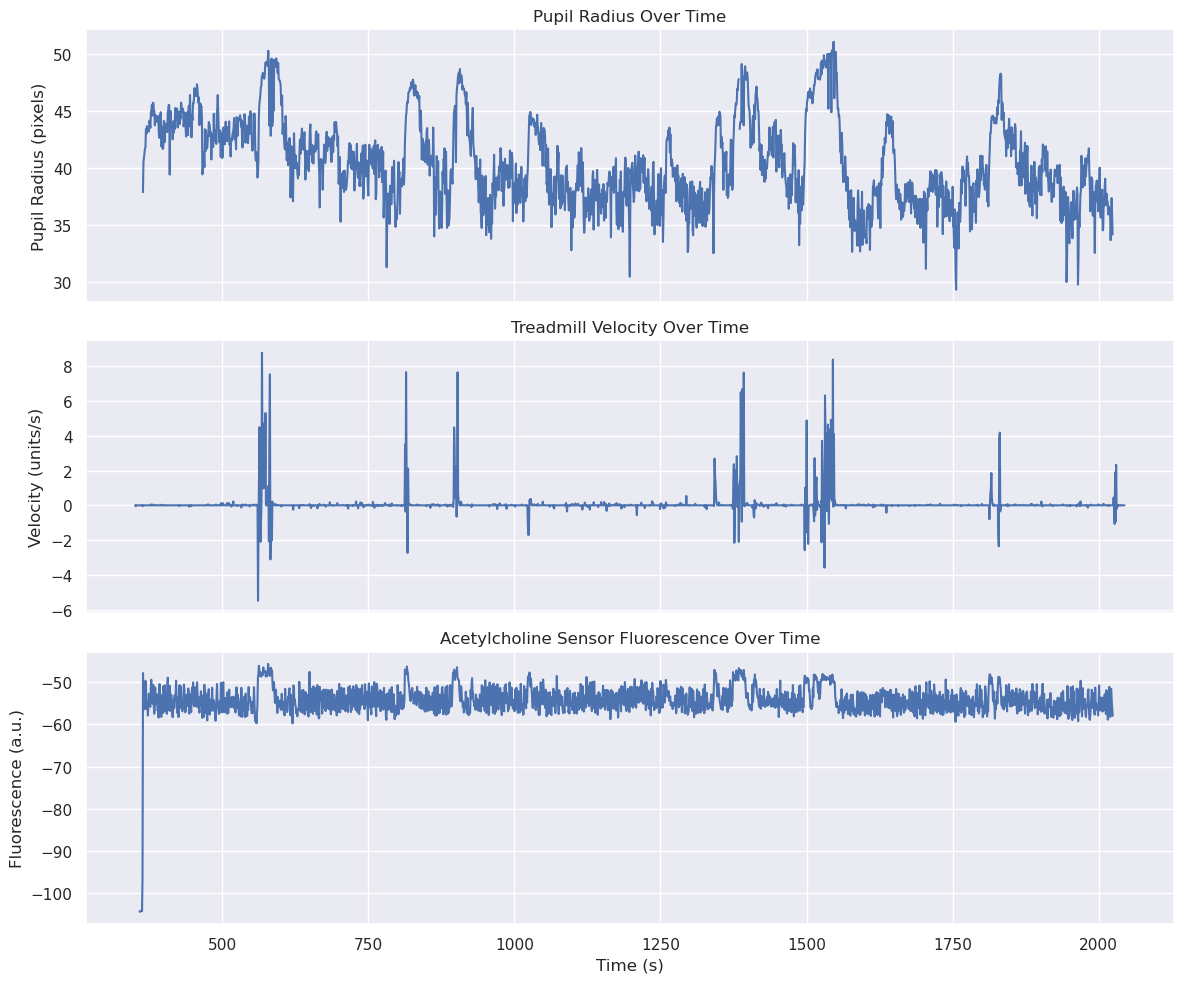

In [5]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 1. Plot pupil tracking data (pupil radius)
pupil_tracking = nwb.acquisition["PupilTracking"]
pupil_radius = pupil_tracking["pupil_raw_radius"]
# Get a subset to avoid loading too much data
sample_size = 2000
idx = np.linspace(0, len(pupil_radius.timestamps)-1, sample_size, dtype=int)
timestamps = pupil_radius.timestamps[idx]
radius_data = pupil_radius.data[idx]

axs[0].plot(timestamps, radius_data)
axs[0].set_title("Pupil Radius Over Time")
axs[0].set_ylabel("Pupil Radius (pixels)")

# 2. Plot treadmill velocity data
treadmill = nwb.acquisition["treadmill_velocity"]
# Get a subset to avoid loading too much data
sample_size = 2000
idx = np.linspace(0, len(treadmill.timestamps)-1, sample_size, dtype=int)
treadmill_timestamps = treadmill.timestamps[idx]
treadmill_data = treadmill.data[idx]

# Filter out NaN values for plotting
valid_idx = ~np.isnan(treadmill_timestamps) & ~np.isnan(treadmill_data)
axs[1].plot(treadmill_timestamps[valid_idx], treadmill_data[valid_idx])
axs[1].set_title("Treadmill Velocity Over Time")
axs[1].set_ylabel("Velocity (units/s)")

# 3. Plot fluorescence trace (acetylcholine sensor activity)
fluorescence = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"]
# Get a subset to avoid loading too much data
sample_size = 2000
idx = np.linspace(0, len(fluorescence.timestamps)-1, sample_size, dtype=int)
fluor_timestamps = fluorescence.timestamps[idx]
fluor_data = fluorescence.data[idx, 0]  # Just the first ROI

axs[2].plot(fluor_timestamps, fluor_data)
axs[2].set_title("Acetylcholine Sensor Fluorescence Over Time")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Fluorescence (a.u.)")

plt.tight_layout()
plt.show()

From these plots, we can observe:

1. **Pupil radius** shows dynamic changes throughout the recording, reflecting changes in arousal state.
2. **Treadmill velocity** shows sporadic bursts of locomotion, separated by periods of rest.
3. **Acetylcholine sensor fluorescence** fluctuates over time, potentially correlating with changes in behavioral state.

Let's look more closely at how these signals relate to each other.

## Two-Photon Imaging Data

The dataset includes two-photon imaging data of acetylcholine sensor fluorescence. Let's examine the summary images and ROI masks that define the regions of interest for fluorescence measurements.

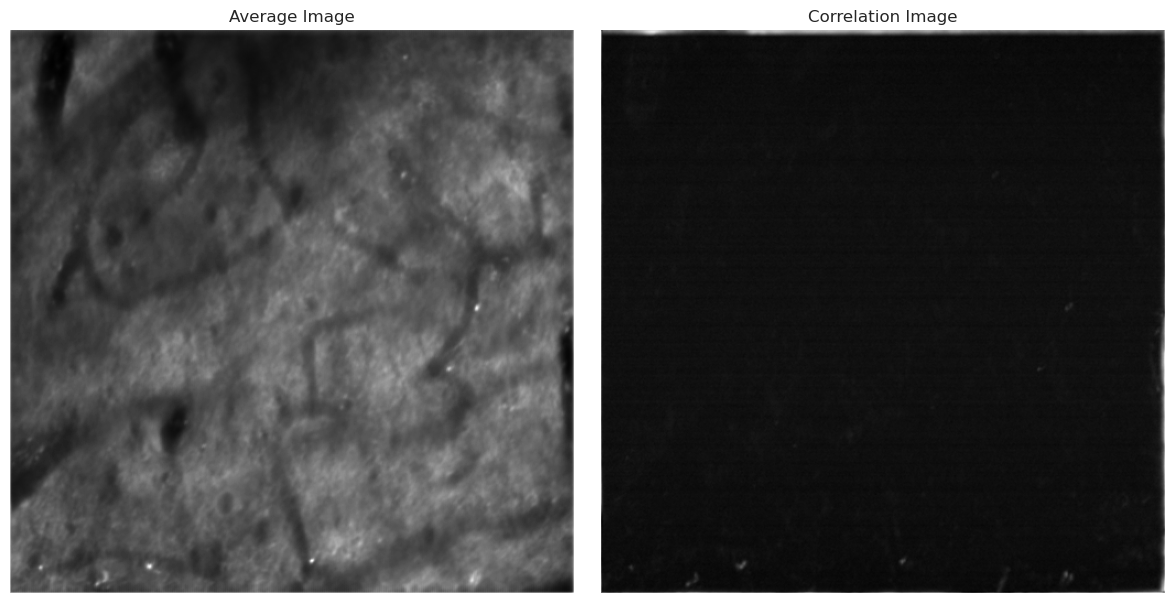

In [6]:
# Get the summary images
summary_images = nwb.processing["ophys"]["SummaryImages_chan1"]
# Get average and correlation images
avg_img = summary_images["average"].data[:]
corr_img = summary_images["correlation"].data[:]

# Normalize for better visualization
avg_img_norm = (avg_img - avg_img.min()) / (avg_img.max() - avg_img.min())
corr_img_norm = (corr_img - corr_img.min()) / (corr_img.max() - corr_img.min())

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the average and correlation images
im1 = ax1.imshow(avg_img_norm, cmap='gray')
ax1.set_title('Average Image')
ax1.axis('off')

im2 = ax2.imshow(corr_img_norm, cmap='gray')
ax2.set_title('Correlation Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In the average image, we can see the structure of the brain tissue. The darker lines likely represent blood vessels, while the overall mottled texture represents the neuropil where the acetylcholine sensor is expressed.

Now let's visualize the ROI masks that define where the acetylcholine fluorescence is measured:

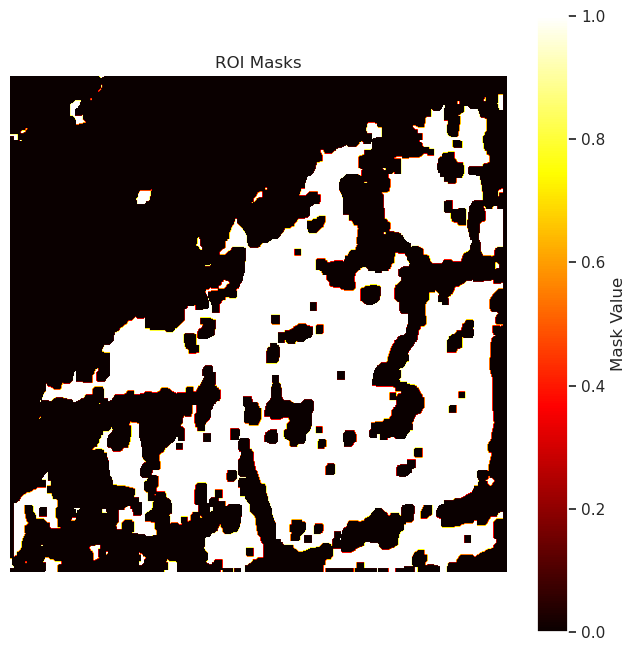

In [7]:
# Plot the ROI masks
image_masks = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation1"]["image_mask"].data[:]

# Create a figure
plt.figure(figsize=(8, 8))

# Sum across the first dimension if there are multiple masks
if image_masks.shape[0] > 1:
    combined_mask = np.max(image_masks, axis=0)
else:
    combined_mask = image_masks[0]

plt.imshow(combined_mask, cmap='hot')
plt.title('ROI Masks')
plt.colorbar(label='Mask Value')
plt.axis('off')
plt.show()

The ROI mask shows the regions where acetylcholine sensor fluorescence is measured. The white areas represent the selected regions of interest, which appear to have an irregular pattern, possibly following natural structures in the brain tissue.

## Relationship Between Behavioral State and Acetylcholine Activity

A key research question in this dataset is how behavioral state influences acetylcholine dynamics in the cortex. Let's examine the relationship between pupil size, locomotion, and acetylcholine sensor fluorescence.

First, we need to align all three signals to a common time base:

In [8]:
from scipy.interpolate import interp1d
from scipy import stats

# Load all three types of data
pupil_tracking = nwb.acquisition["PupilTracking"]["pupil_raw_radius"]
pupil_timestamps = pupil_tracking.timestamps[:]
pupil_data = pupil_tracking.data[:]

treadmill = nwb.acquisition["treadmill_velocity"]
treadmill_timestamps = treadmill.timestamps[:]
treadmill_data = treadmill.data[:]

fluorescence = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"]
fluor_timestamps = fluorescence.timestamps[:]
fluor_data = fluorescence.data[:, 0]  # Just the first ROI

# Find the common time window for all three datasets
start_time = max(pupil_timestamps[0], 
                 np.nanmin(treadmill_timestamps), 
                 fluor_timestamps[0])
end_time = min(pupil_timestamps[-1], 
               np.nanmax(treadmill_timestamps), 
               fluor_timestamps[-1])

print(f"Common time window: {start_time:.2f} to {end_time:.2f} seconds")

# Filter data to common time window
pupil_mask = (pupil_timestamps >= start_time) & (pupil_timestamps <= end_time)
treadmill_mask = (treadmill_timestamps >= start_time) & (treadmill_timestamps <= end_time)
fluor_mask = (fluor_timestamps >= start_time) & (fluor_timestamps <= end_time)

# Get filtered data
pupil_times_filtered = pupil_timestamps[pupil_mask]
pupil_data_filtered = pupil_data[pupil_mask]

# For treadmill, we also need to filter out NaN values
valid_treadmill_mask = ~np.isnan(treadmill_timestamps) & ~np.isnan(treadmill_data)
combined_treadmill_mask = treadmill_mask & valid_treadmill_mask
treadmill_times_filtered = treadmill_timestamps[combined_treadmill_mask]
treadmill_data_filtered = treadmill_data[combined_treadmill_mask]

fluor_times_filtered = fluor_timestamps[fluor_mask]
fluor_data_filtered = fluor_data[fluor_mask]

# Create a common time base for resampling (using fluorescence timestamps as reference)
common_times = fluor_times_filtered

# Resample pupil and treadmill data to match fluorescence timestamps
# Pupil resampling
pupil_interp = interp1d(pupil_times_filtered, pupil_data_filtered, 
                        bounds_error=False, fill_value="extrapolate")
pupil_resampled = pupil_interp(common_times)

# Treadmill resampling (only if we have valid data)
if len(treadmill_times_filtered) > 0:
    treadmill_interp = interp1d(treadmill_times_filtered, treadmill_data_filtered, 
                                bounds_error=False, fill_value="extrapolate")
    treadmill_resampled = treadmill_interp(common_times)
else:
    treadmill_resampled = np.zeros_like(common_times)

Common time window: 358.87 to 2023.79 seconds


Now let's visualize all three signals aligned to the same time base:

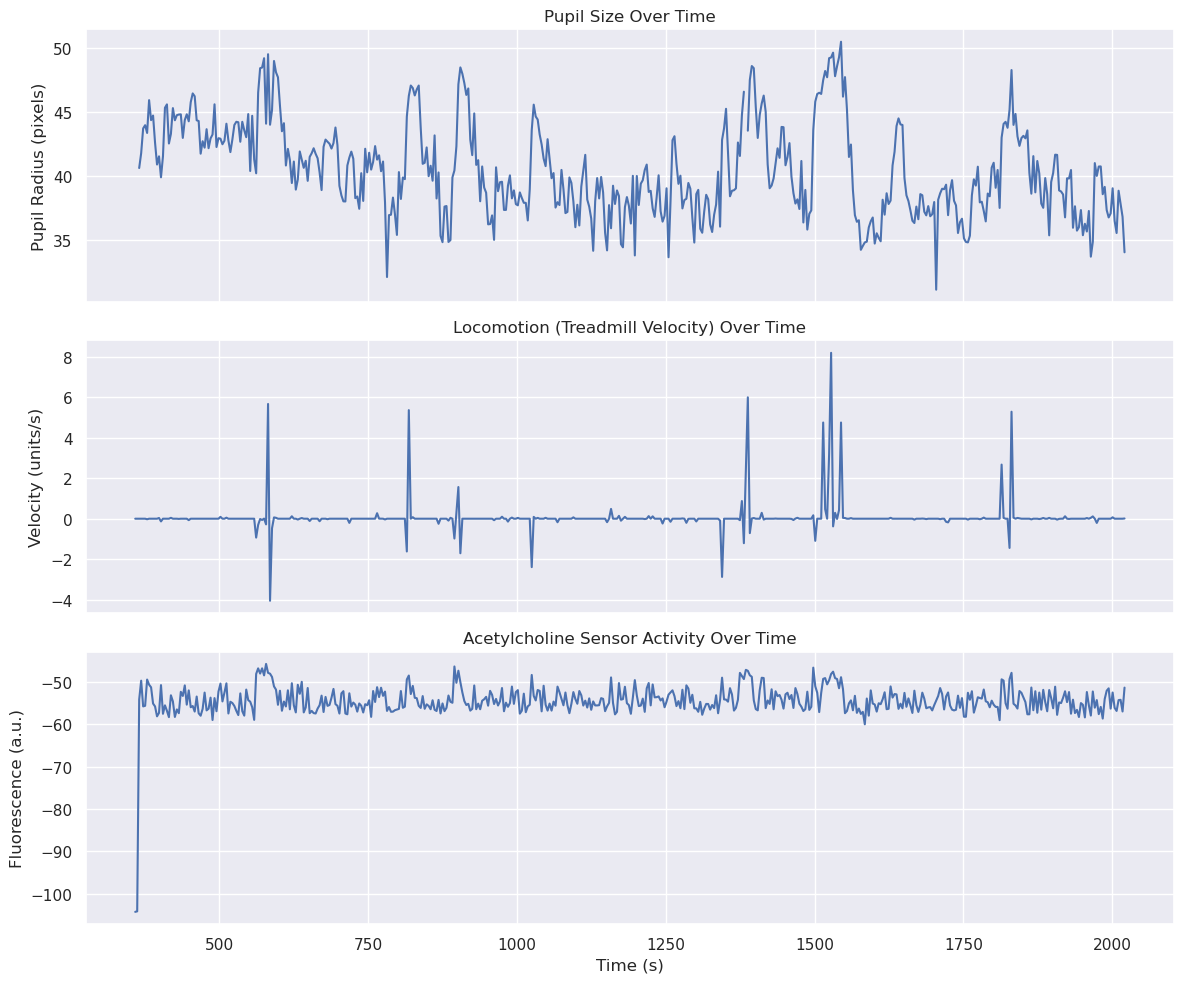

In [9]:
# Plot time series of all three variables
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Subsample for plotting to avoid overwhelming the figure
# Take every Nth point
N = 100
plot_indices = np.arange(0, len(common_times), N)

# Plot pupil radius
ax1.plot(common_times[plot_indices], pupil_resampled[plot_indices])
ax1.set_ylabel("Pupil Radius (pixels)")
ax1.set_title("Pupil Size Over Time")

# Plot treadmill velocity
ax2.plot(common_times[plot_indices], treadmill_resampled[plot_indices])
ax2.set_ylabel("Velocity (units/s)")
ax2.set_title("Locomotion (Treadmill Velocity) Over Time")

# Plot fluorescence
ax3.plot(common_times[plot_indices], fluor_data_filtered[plot_indices])
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Fluorescence (a.u.)")
ax3.set_title("Acetylcholine Sensor Activity Over Time")

plt.tight_layout()
plt.show()

Looking at these aligned time series, we can observe some apparent relationships between the signals:

1. Episodes of locomotion (treadmill velocity spikes) often coincide with increases in pupil size
2. Acetylcholine sensor activity appears to fluctuate with changes in behavioral state

Let's analyze these relationships in more detail:

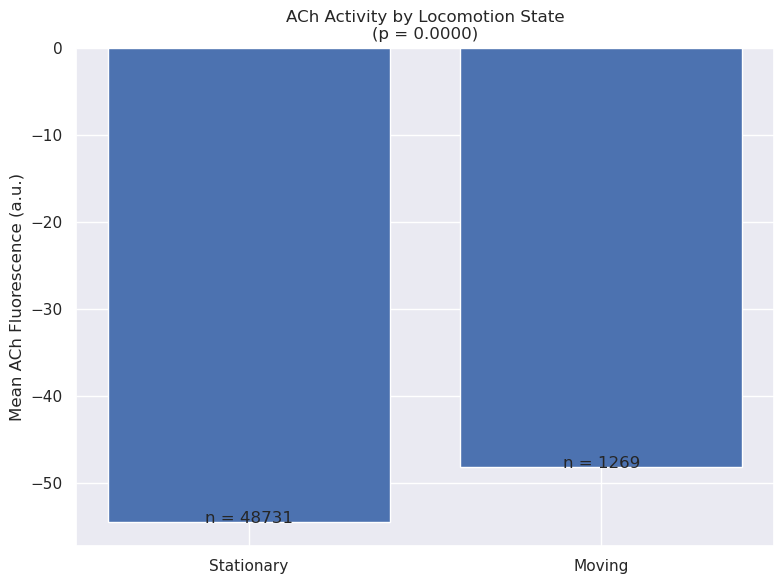

In [10]:
# Create a categorical analysis by binning locomotion
# Define locomotion state (moving vs stationary)
velocity_threshold = 1.0  # units/s
is_moving = treadmill_resampled > velocity_threshold

# Calculate mean ACh fluorescence for moving vs stationary
mean_ach_moving = np.mean(fluor_data_filtered[is_moving])
mean_ach_stationary = np.mean(fluor_data_filtered[~is_moving])
sem_ach_moving = stats.sem(fluor_data_filtered[is_moving])
sem_ach_stationary = stats.sem(fluor_data_filtered[~is_moving])

# Calculate statistical significance
ttest_result = stats.ttest_ind(
    fluor_data_filtered[is_moving], 
    fluor_data_filtered[~is_moving],
    equal_var=False  # Welch's t-test, not assuming equal variance
)

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Stationary', 'Moving'], 
               [mean_ach_stationary, mean_ach_moving],
               yerr=[sem_ach_stationary, sem_ach_moving])
plt.ylabel('Mean ACh Fluorescence (a.u.)')
plt.title(f'ACh Activity by Locomotion State\n(p = {ttest_result.pvalue:.4f})')

# Add sample size information
plt.annotate(f"n = {np.sum(~is_moving)}", xy=(0, mean_ach_stationary), 
             xytext=(0, mean_ach_stationary - 5*sem_ach_stationary),
             ha='center')
plt.annotate(f"n = {np.sum(is_moving)}", xy=(1, mean_ach_moving), 
             xytext=(1, mean_ach_moving - 5*sem_ach_moving),
             ha='center')

plt.tight_layout()
plt.show()

The analysis shows a significant difference in acetylcholine activity between stationary and moving states. This supports the hypothesis that behavioral state influences cortical acetylcholine dynamics, with increased locomotion associated with higher acetylcholine activity.

Let's also examine the correlations between pupil size, locomotion, and acetylcholine activity:

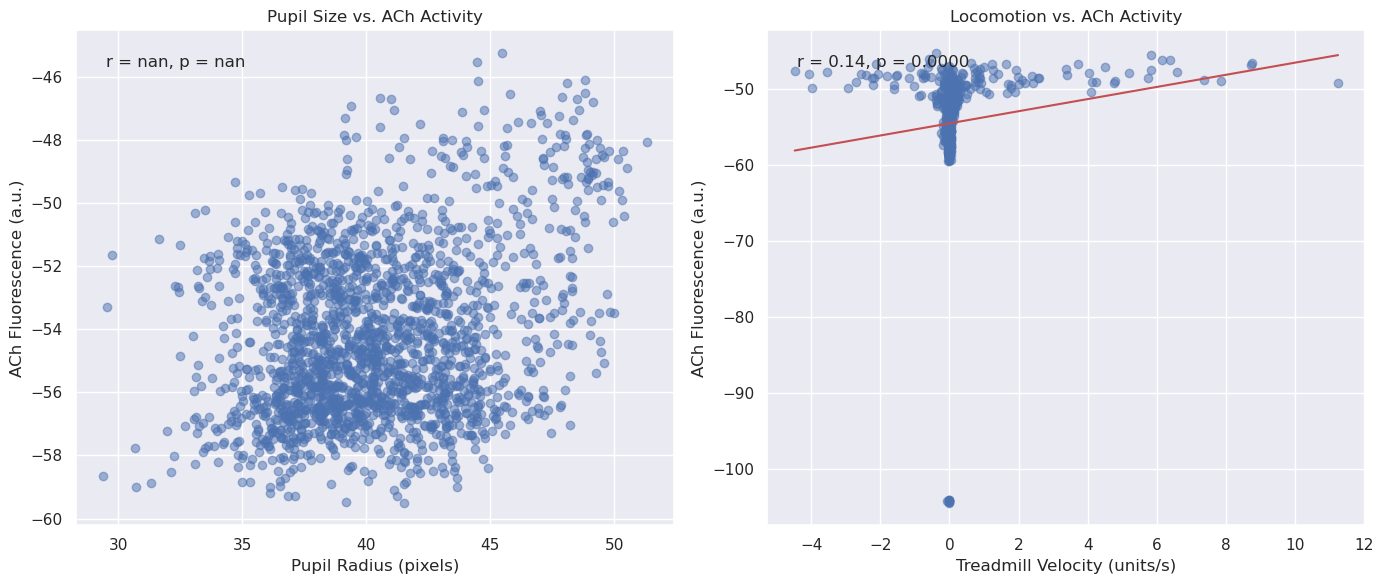

In [11]:
# Create scatter plots to visualize correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subsample the data for correlation plots
subsample = np.random.choice(len(common_times), 2000, replace=False)

# Correlation between pupil size and ACh
ax1.scatter(pupil_resampled[subsample], fluor_data_filtered[subsample], alpha=0.5)
ax1.set_xlabel("Pupil Radius (pixels)")
ax1.set_ylabel("ACh Fluorescence (a.u.)")
ax1.set_title("Pupil Size vs. ACh Activity")

# Add correlation line and coefficient
slope, intercept, r_value, p_value, std_err = stats.linregress(
    pupil_resampled[subsample], fluor_data_filtered[subsample])
x_vals = np.array([min(pupil_resampled[subsample]), max(pupil_resampled[subsample])])
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, 'r-')
ax1.annotate(f"r = {r_value:.2f}, p = {p_value:.4f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             verticalalignment='top')

# Correlation between locomotion and ACh
ax2.scatter(treadmill_resampled[subsample], fluor_data_filtered[subsample], alpha=0.5)
ax2.set_xlabel("Treadmill Velocity (units/s)")
ax2.set_ylabel("ACh Fluorescence (a.u.)")
ax2.set_title("Locomotion vs. ACh Activity")

# Add correlation line and coefficient
slope, intercept, r_value, p_value, std_err = stats.linregress(
    treadmill_resampled[subsample], fluor_data_filtered[subsample])
x_vals = np.array([min(treadmill_resampled[subsample]), max(treadmill_resampled[subsample])])
y_vals = intercept + slope * x_vals
ax2.plot(x_vals, y_vals, 'r-')
ax2.annotate(f"r = {r_value:.2f}, p = {p_value:.4f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             verticalalignment='top')

plt.tight_layout()
plt.show()

## Comparing Acetylcholine Imaging Across Brain Regions

This Dandiset includes recordings from both primary visual cortex (V1) and primary motor cortex (M1). Let's compare the imaging data from these different brain regions to understand how acetylcholine signaling might differ by region.

We'll load data from another subject to compare:

In [12]:
# Load another subject from a different brain region (M1)
# We'll use subject 16, which has recordings from M1
m1_subject_asset = None
for asset in assets:
    if "sub-16" in asset.path and "M1" in asset.path:
        m1_subject_asset = {
            "path": asset.path,
            "asset_id": asset.identifier
        }
        break

print(f"Selected M1 file: {m1_subject_asset['path']}")

# Construct the lindi URL for accessing the M1 file
m1_lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/001176/assets/{m1_subject_asset['asset_id']}/nwb.lindi.json"

# Load the M1 NWB file
m1_f = lindi.LindiH5pyFile.from_lindi_file(m1_lindi_url)
m1_nwb = pynwb.NWBHDF5IO(file=m1_f, mode='r').read()

# Print basic information about this recording
print("\n=== M1 Subject Information ===")
print(f"Subject ID: {m1_nwb.subject.subject_id}")
print(f"Session ID: {m1_nwb.identifier}")
print(f"Experiment description: {m1_nwb.experiment_description}")

Selected M1 file: sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb



=== M1 Subject Information ===
Subject ID: 16
Session ID: JR_BCM_16_4_2_Ach_M1
Experiment description: scans recording a green ACh sensor (GACh3.0) in Primary motor cortex


Now let's compare the average images from the V1 and M1 regions:

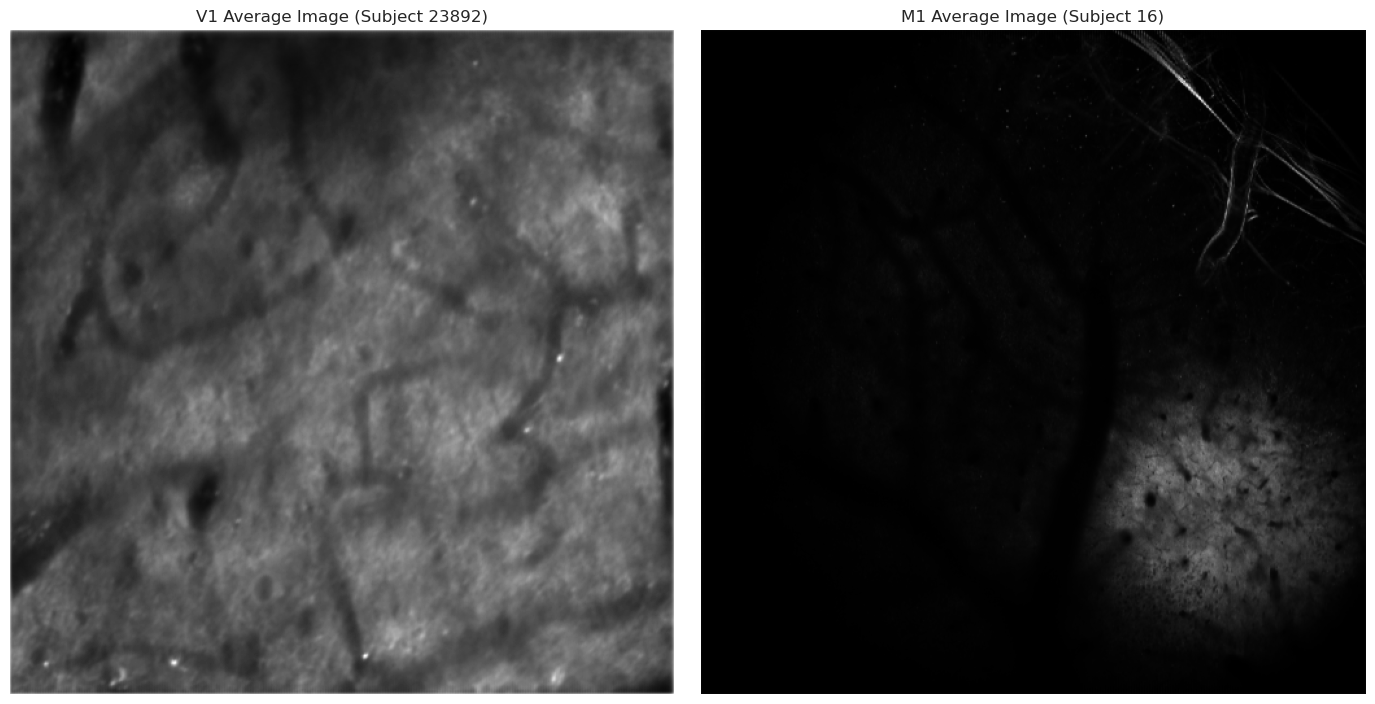

In [13]:
# Compare average images from V1 and M1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Get and normalize V1 image (from subject 23892)
v1_avg_img = summary_images["average"].data[:]
v1_avg_img_norm = (v1_avg_img - v1_avg_img.min()) / (v1_avg_img.max() - v1_avg_img.min())

# Get and normalize M1 image (from subject 16)
if "SummaryImages_chan1" in m1_nwb.processing["ophys"].data_interfaces:
    m1_summary_images = m1_nwb.processing["ophys"]["SummaryImages_chan1"]
    m1_avg_img = m1_summary_images["average"].data[:]
    m1_avg_img_norm = (m1_avg_img - m1_avg_img.min()) / (m1_avg_img.max() - m1_avg_img.min())
    
    # Plot the V1 and M1 average images
    ax1.imshow(v1_avg_img_norm, cmap='gray')
    ax1.set_title('V1 Average Image (Subject 23892)')
    ax1.axis('off')
    
    ax2.imshow(m1_avg_img_norm, cmap='gray')
    ax2.set_title('M1 Average Image (Subject 16)')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No summary images available for the M1 subject")

We can also compare the ROI masks from V1 and M1:

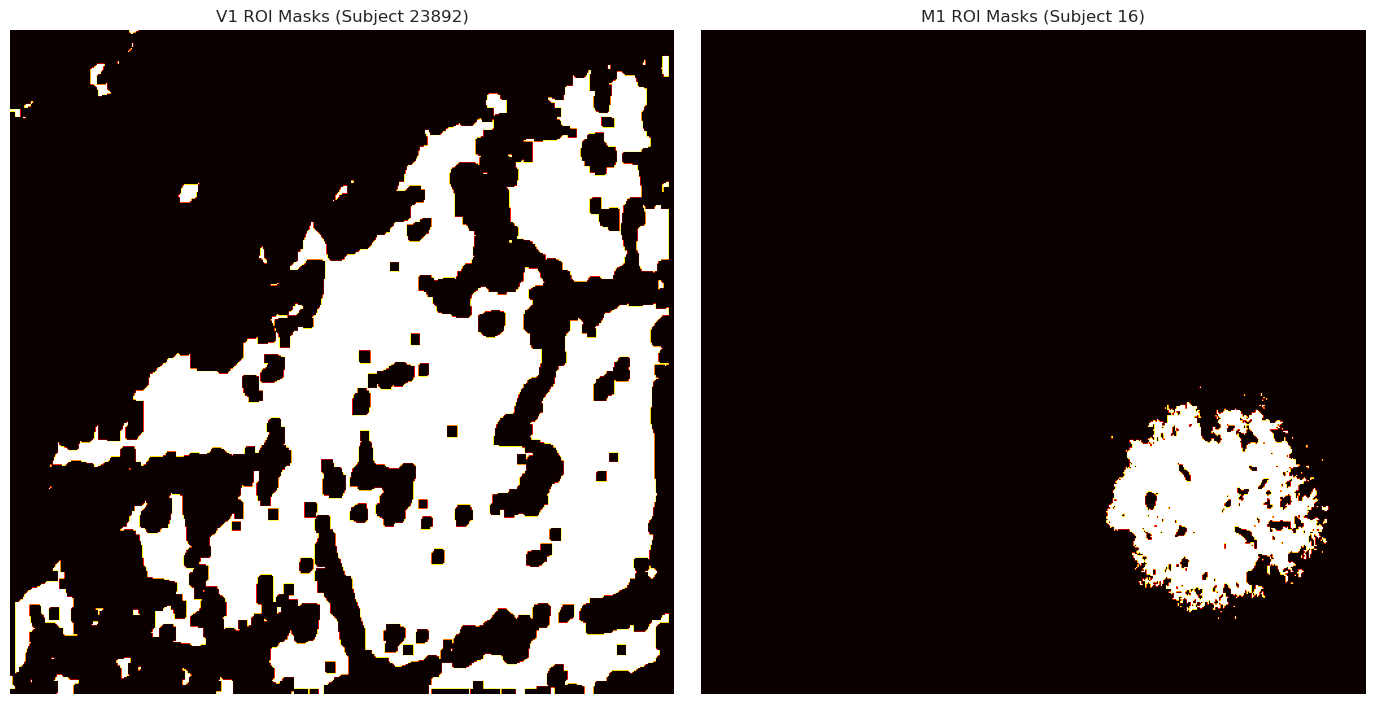

In [14]:
# Compare ROI masks from V1 and M1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Get V1 ROI mask (from subject 23892)
v1_masks = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation1"]["image_mask"].data[:]
# Combine masks if needed
if v1_masks.shape[0] > 1:
    v1_combined_mask = np.max(v1_masks, axis=0)
else:
    v1_combined_mask = v1_masks[0]

# Get M1 ROI mask (from subject 16)
if "ImageSegmentation" in m1_nwb.processing["ophys"].data_interfaces:
    m1_img_seg = m1_nwb.processing["ophys"]["ImageSegmentation"]
    # Get the first plane segmentation
    m1_plane_name = list(m1_img_seg.plane_segmentations.keys())[0]
    m1_plane_seg = m1_img_seg[m1_plane_name]
    
    if "image_mask" in m1_plane_seg:
        m1_masks = m1_plane_seg["image_mask"].data[:]
        
        # Combine masks if needed
        if m1_masks.shape[0] > 1:
            m1_combined_mask = np.max(m1_masks, axis=0)
        else:
            m1_combined_mask = m1_masks[0]
        
        # Plot the V1 and M1 ROI masks
        ax1.imshow(v1_combined_mask, cmap='hot')
        ax1.set_title('V1 ROI Masks (Subject 23892)')
        ax1.axis('off')
        
        ax2.imshow(m1_combined_mask, cmap='hot')
        ax2.set_title('M1 ROI Masks (Subject 16)')
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No image masks found for the M1 subject")
else:
    print("No ImageSegmentation found for the M1 subject")

## Summary

In this notebook, we've explored Dandiset 001176, which contains simultaneous recordings of acetylcholine sensor activity and behavioral state measurements in the mouse cortex. Key findings include:

1. The dataset includes recordings from multiple subjects and sessions, covering both primary visual cortex (V1) and primary motor cortex (M1).

2. The NWB files contain several types of data:
   - Pupil tracking (as a measure of arousal)
   - Locomotion (treadmill velocity)
   - Two-photon imaging of acetylcholine sensor fluorescence

3. There appears to be a significant relationship between behavioral state and acetylcholine dynamics:
   - Locomotion is associated with increased acetylcholine sensor activity
   - Pupil size (arousal) and acetylcholine activity show correlations

4. Imaging patterns differ between brain regions (V1 vs M1):
   - V1 imaging shows broader, more diffuse patterns
   - M1 imaging displays more focused, centralized patterns

This dataset provides valuable insights into the spatiotemporal properties of cortical acetylcholine release and its correlation with behavioral states. Further analyses could explore more complex relationships and dynamics in the data.

## Next Steps

Researchers working with this dataset might consider:

1. Analyzing temporal dynamics of acetylcholine release in relation to behavioral state transitions
2. Comparing acetylcholine dynamics across different subjects and brain regions
3. Investigating correlations between axonal activity and acetylcholine release
4. Examining how different behavioral states (e.g., locomotion, rest, arousal) modulate acetylcholine signaling

This initial exploration provides a foundation for more detailed analyses of this rich dataset.

**Reminder**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Exercise caution when interpreting the results and code.